In [3]:
import pandas as pd

# Load the data into a pandas DataFrame
data = pd.read_excel("Data/2W# - Copy.xlsx")

# Sort the data based on gap values
sorted_data = data.sort_values(by="Gap")

# Initialize counters for accepted and rejected gaps
accepted_count = 0
rejected_count = 0

# Iterate through the sorted data to find the critical gap
critical_gap = None
for index, row in sorted_data.iterrows():
    if row["Status"] == 1:
        print(accepted_count)
    else:
        print(rejected_count)

    if accepted_count >= rejected_count:
        critical_gap = row["Gap"]
        print(row)
        break

print("Critical Gap:", critical_gap)


0
Gap        0.100
Speed     44.775
Status     0.000
Name: 0, dtype: float64
Critical Gap: 0.1


Critical Gap: 1.6600000000000015


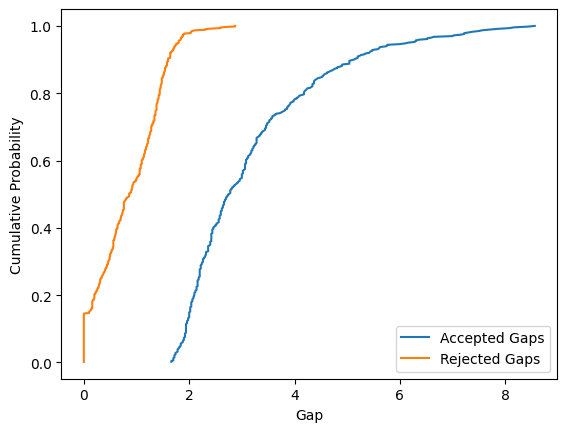

In [2]:
import pandas as pd

# Load the dataset
file_path = "Data\\2W# - Copy II.xlsx"
df = pd.read_excel(file_path)

# Filter the dataset to include only relevant columns
relevant_columns = ["Gap", "Lag", "Status"]
df = df[relevant_columns]

# Calculate cumulative probabilities for accepted and rejected gaps
accepted_gaps = df[df["Status"] == 1]["Gap"]
rejected_gaps = df[df["Status"] == 0]["Gap"]

total_accepted = len(accepted_gaps)
total_rejected = len(rejected_gaps)

accepted_gaps = accepted_gaps.sort_values()
rejected_gaps = rejected_gaps.sort_values()

cumulative_accepted = [i / total_accepted for i in range(1, total_accepted + 1)]
cumulative_rejected = [i / total_rejected for i in range(1, total_rejected + 1)]

# Find the critical gap value
critical_gap = None

for i in range(len(cumulative_accepted)):
    if cumulative_accepted[i] > cumulative_rejected[i]:
        critical_gap = accepted_gaps.iloc[i]
        break

# Print the critical gap
if critical_gap is not None:
    print("Critical Gap:", critical_gap)
else:
    print("Critical Gap not found.")

# Optionally, you can also plot the cumulative distribution functions (CDFs) if desired.
import matplotlib.pyplot as plt

plt.plot(accepted_gaps, cumulative_accepted, label="Accepted Gaps")
plt.plot(rejected_gaps, cumulative_rejected, label="Rejected Gaps")
plt.xlabel("Gap")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.show()


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the data into a pandas DataFrame
data = pd.read_excel("Data/2W#.xlsx")

# Separate the features (X) and the target variable (y)
X = data.drop("Status", axis=1)  # Assuming "Status" is the name of the target variable column
y = data["Status"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize diverse base models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
svm_model = SVC(kernel='linear', probability=True)  # SVC with probability=True for voting
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)  # Example MLP

# Create a voting ensemble with the diverse models
ensemble_model = VotingClassifier(
    estimators=[('random_forest', rf_model), ('gradient_boosting', gb_model),
                ('svm', svm_model), ('mlp', mlp_model)],
    voting='soft'  # Use 'soft' voting for probability-based ensemble
)

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions using the ensemble model
ensemble_preds = ensemble_model.predict(X_test)

# Evaluate the performance of the ensemble model
def evaluate_model(predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    
    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print()

evaluate_model(ensemble_preds, "Voting Ensemble")


Metrics for Voting Ensemble:
Accuracy: 0.9767
Precision: 0.9789
Recall: 0.9688
F1-score: 0.9738



In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the data into a pandas DataFrame
data = pd.read_excel("Data/2W#.xlsx")

# Separate the features (X) and the target variable (y)
X = data.drop("Status", axis=1)  # Assuming "Status" is the name of the target variable column
y = data["Status"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize diverse base models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
svm_model = SVC(kernel='linear', probability=True)  # SVC with probability=True for voting
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)  # Example MLP

# Train the diverse base models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
mlp_model.fit(X_train, y_train)

# Create a voting ensemble with the diverse models
ensemble_model = VotingClassifier(
    estimators=[('random_forest', rf_model), ('gradient_boosting', gb_model),
                ('svm', svm_model), ('mlp', mlp_model)],
    voting='soft'  # Use 'soft' voting for probability-based ensemble
)

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions using the ensemble model
ensemble_preds = ensemble_model.predict(X_test)

# Evaluate the performance of each model
def evaluate_model(predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    
    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print()

# Evaluate ensemble model
evaluate_model(ensemble_preds, "Voting Ensemble")

# Evaluate individual models
rf_preds = rf_model.predict(X_test)
gb_preds = gb_model.predict(X_test)
svm_preds = svm_model.predict(X_test)
mlp_preds = mlp_model.predict(X_test)

evaluate_model(rf_preds, "Random Forest")
evaluate_model(gb_preds, "Gradient Boosting")
evaluate_model(svm_preds, "SVM")
evaluate_model(mlp_preds, "MLP")


Metrics for Voting Ensemble:
Accuracy: 0.9767
Precision: 0.9789
Recall: 0.9688
F1-score: 0.9738

Metrics for Random Forest:
Accuracy: 0.9767
Precision: 0.9789
Recall: 0.9688
F1-score: 0.9738

Metrics for Gradient Boosting:
Accuracy: 0.9767
Precision: 0.9789
Recall: 0.9688
F1-score: 0.9738

Metrics for SVM:
Accuracy: 0.9721
Precision: 0.9688
Recall: 0.9688
F1-score: 0.9688

Metrics for MLP:
Accuracy: 0.9628
Precision: 0.9783
Recall: 0.9375
F1-score: 0.9574

